## Loading data into files and containers

In [2]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
import pandas as pd

### Downloading data set should not need to do know


In [3]:
#!kaggle datasets download --force -d kmader/skin-cancer-mnist-ham10000

In [4]:
archive = os.listdir()[-1]
cur_dir = os.getcwd()
a = os.path.join(cur_dir, archive)
print(a)

C:\Users\Greg\HackPSU\skin-cancer-mnist-ham10000.zip


In [5]:
'''
with ZipFile(archive , 'r') as zip_ref:
    zip_ref.extractall('./')
'''

In [6]:
path_1 = 'HAM10000_images_part_1'
path_2 = 'HAM10000_images_part_2'
path_meta = 'HAM10000_metadata.csv'

['.ipynb_checkpoints',
 'HackPSU2022',
 'HAM10000_images_part_1',
 'HAM10000_images_part_2',
 'HAM10000_metadata.csv',
 'hmnist_28_28_L.csv',
 'hmnist_28_28_RGB.csv',
 'hmnist_8_8_L.csv',
 'hmnist_8_8_RGB.csv',
 'kaggle.json',
 'Skin Cancer Detector.ipynb',
 'skin-cancer-mnist-ham10000.zip']

### Read data

In [7]:
file_path1 = os.path.join(cur_dir, path_1) #HAM10000_images_part_1
file_path2 = os.path.join(cur_dir, path_2) #HAM10000_images_part_2

len(os.listdir(file_path1)), len(os.listdir(file_path2))

(5000, 5015)

In [9]:
metadata_path = os.path.join(cur_dir, meta_path)
df = pd.read_csv(metadata_path)
df['lesion_id'].unique().shape, df

##
df_ids_img = df[['lesion_id','image_id','dx']]
df_ids_img

,lesion_id,image_id,dx
0,HAM_0000118,ISIC_0027419,bkl
1,HAM_0000118,ISIC_0025030,bkl
2,HAM_0002730,ISIC_0026769,bkl
3,HAM_0002730,ISIC_0025661,bkl
4,HAM_0001466,ISIC_0031633,bkl
...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec
10011,HAM_0002867,ISIC_0033550,akiec
10012,HAM_0002867,ISIC_0033536,akiec
10013,HAM_0000239,ISIC_0032854,akiec


This shows that we have 7470 unique images and duplicates that are either different views or magnified.

### First folder processing

In [12]:
num_1 = int( len(os.listdir(file_path1)) / 2 )

In [18]:
imgs_1 = [ np.zeros((450,600,3),'float32') for k in  range( num_1 ) ]
len(imgs_1)

2500

In [21]:
target = np.zeros(5000).astype('str') # String data one-hot encode later

target.shape, 

((5000,),)

In [28]:
sizes = []
min = 100
max = -1

for img in imgs_1:
    if( img.shape not in sizes ):
        sizes.append(img.shape)
sizes

[(450, 600, 3)]

In [32]:
size = (225,300)
for i, img in enumerate( os.listdir(file_path1) ): #Loop through each file
    if( i < 2500 ):
        p_id = img.split('.')[0]#Extract id
        target[i] = df[ df['image_id'] == p_id ]['dx'].iloc[0] # Target Feature
        imgs_1[i] = cv.resize( cv.imread( os.path.join(file_path1, img) ), size ) # Load data into array 
        # May want to change the color scheme, but we will see                   

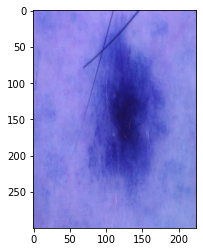

In [33]:
plt.imshow(imgs_1[0])

### normalize images

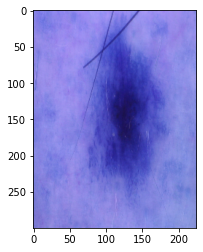

In [36]:
imgs_1_norm = [ img / 255.0 for img in imgs_1 ]
plt.imshow(imgs_1_norm[0])